In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbStabilizerCode import FiveQbStabilizerCodeCircuit
from functions import *


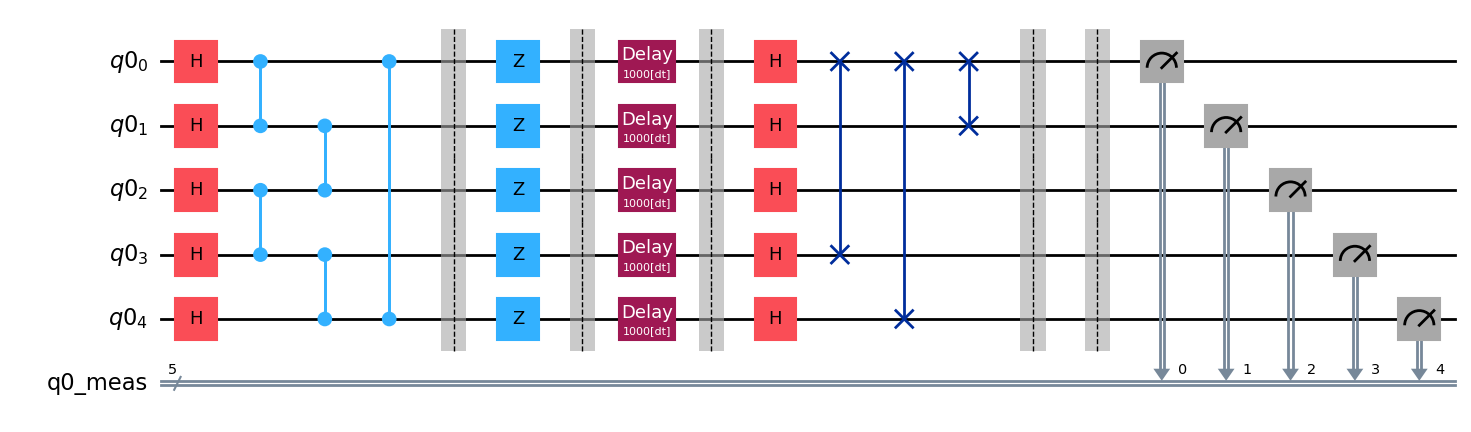

In [2]:


def load_circuit(delay):
    qc = FiveQbStabilizerCodeCircuit(1)

    # qc.initial_state(state='+')
    # type = 'universal'
    type = '-'
    qc.encode(type=type) # |-> logico
    qc.z()  # pasar a |+> logico
    qc.delay(delay)

    qc.h(swap=True) # |0> logico (base 0,1)
    # qc.measure(basis='X')
    qc.measure_all()

    return qc

qc = load_circuit(1000)
qc.draw('mpl')



In [3]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_brisbane")

In [4]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 11
Transpiled Circuit Depth: 34


In [5]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.5 ns


In [6]:
# t_array = [2_500, 5_000, 10_000, 20_000, 80_000, 160_000, 320_000]
# t_array = [t*2_500 for t in range(0, 13)]
t_array = [t*4_000 for t in range(0, 6)]
print([round(t*dt * 10**(-3), 3) for t in t_array])


[0.0, 2.0, 4.0, 6.0, 8.0, 10.0]


In [13]:

circuits = []

for t in t_array:

    qc = load_circuit(t)

    isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=10,
                                initial_layout = [64, 65, 63, 66, 73]
                                )
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")
    # c.draw(output='mpl')

Circuit Depth: 28
Delay Duration: 0.0 us
Total Duration: 5.74 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49660\3489182682.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 29
Delay Duration: 2.0 us
Total Duration: 7.74 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49660\3489182682.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 29
Delay Duration: 4.0 us
Total Duration: 9.74 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49660\3489182682.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 29
Delay Duration: 6.0 us
Total Duration: 11.74 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49660\3489182682.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 29
Delay Duration: 8.0 us
Total Duration: 13.74 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49660\3489182682.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 29
Delay Duration: 10.0 us
Total Duration: 15.74 us



C:\Users\marzu\AppData\Local\Temp\ipykernel_49660\3489182682.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


In [12]:

for c in circuits:
    print(get_layout(c, qb_len=5))


[64, 65, 63, 66, 73]
[64, 65, 63, 66, 73]
[64, 65, 63, 66, 73]
[64, 65, 63, 66, 73]
[64, 65, 63, 66, 73]
[64, 65, 63, 66, 73]


In [7]:
simulation_result = sampler_simulation(qc.physical_circuit, 3200)

for lq in qc.qubits:

    # state = lq.qb_measure
    state = lq.qb_measures
    # state = lq.all_measures
    print(f"  {state.name}: {simulation_result.data[state.name].get_counts()}")


  q0_meas: {'00011': 201, '01010': 204, '01111': 213, '10111': 201, '00110': 186, '10100': 204, '00000': 211, '01100': 203, '10001': 207, '00101': 200, '11011': 217, '10010': 208, '11101': 166, '11110': 205, '01001': 181, '11000': 193}


In [8]:
sampler = SamplerV2(backend=backend)
shots = 3200
# job = sampler.run(circuits, shots=shots)
# job = service.job('cxjxbqe6t010008d0dhg') # t_array = [2_500, 5_000, 10_000, 20_000, 80_000, 160_000, 320_000]
# job = service.job('cxjyha56t010008d0h0g') # t_array = [t*10_000 for t in range(0, 21)]
# job = service.job('cy6r20gnrmz00085n7xg') # volver a |0> logico para medir en base computacional
# job = service.job('cy78n44rta1g008799kg') # t_array = [t*2_500 for t in range(0, 13)]
job = service.job('cyhbzfdrta1g008v9v00') # shots = 3200, t_array = [t*4_000 for t in range(0, 6)]


pub_result = job.result()


In [9]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]

results = []
for i in range(len(t_array)):
    result = pub_result[i]
    meas = result['__value__']['data']['q0_meas'].get_counts()
    res = {}
    for k in states:
        k_inv = k[::-1]
        res[k] = meas[k_inv] if k_inv in meas else 0
        res[k] = res[k]/shots*100
    results.append(res)

In [10]:

delays = [round(t*dt/1000) for t in t_array]
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(results[i][s]*shots/100) for s in states], sep='\t ')

 delay (μs)	 00000	 00001	 00010	 00011	 00100	 00101	 00110	 00111	 01000	 01001	 01010	 01011	 01100	 01101	 01110	 01111	 10000	 10001	 10010	 10011	 10100	 10101	 10110	 10111	 11000	 11001	 11010	 11011	 11100	 11101	 11110	 11111
----------------------------------------------------------------------------------
 0		 78	 51	 84	 91	 123	 177	 128	 99	 96	 194	 179	 53	 96	 28	 70	 96	 29	 86	 107	 56	 202	 109	 43	 123	 198	 58	 36	 210	 22	 102	 149	 27
 2		 107	 143	 100	 30	 100	 91	 108	 180	 30	 220	 219	 61	 103	 81	 33	 37	 27	 104	 184	 106	 158	 33	 88	 41	 140	 70	 66	 152	 59	 87	 43	 199
 4		 119	 253	 151	 70	 37	 69	 99	 40	 110	 143	 119	 42	 100	 129	 88	 116	 103	 112	 85	 169	 91	 30	 52	 100	 174	 93	 69	 79	 91	 66	 84	 117
 6		 91	 103	 49	 43	 141	 209	 117	 59	 141	 156	 31	 49	 99	 150	 97	 85	 112	 53	 71	 100	 121	 78	 110	 131	 112	 66	 39	 67	 108	 57	 134	 221
 8		 38	 52	 41	 30	 180	 253	 136	 97	 46	 43	 28	 25	 185	 194	 119	 137	 37	 35	 56	 40	 1

In [11]:
valid_states = [s for s in states if sum([int(i) for i in s]) % 2 == 0]

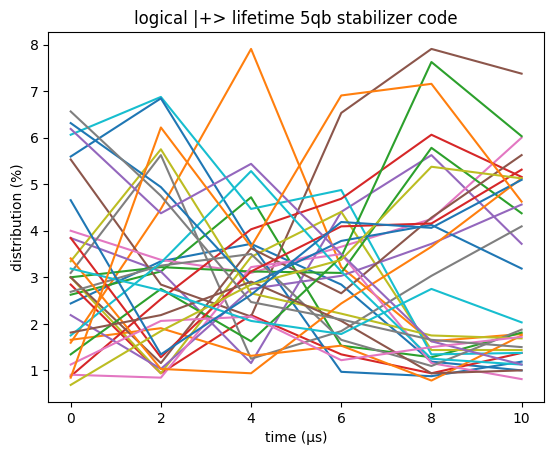

In [12]:
import matplotlib.pyplot as plt
import math

# x = [math.log(d) for d in delays]
x = delays
y = {}
for s in states:
    y[s] = [r[s] for r in results]

    plt.plot(x, y[s], label=s)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime 5qb stabilizer code')
# plt.legend()

# Display the plot
plt.show()

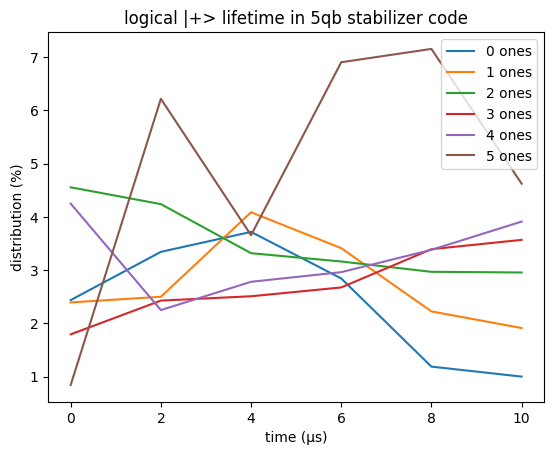

In [13]:

for n in [0,1,2,3,4,5]:

    n_ones_states = [s for s in states if sum([int(i) for i in s]) == n]
    plt.plot(x, [sum([r[s] for s in n_ones_states])/len(n_ones_states) for r in results], label=f"{n} ones")



# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime in 5qb stabilizer code')
plt.legend()

# Display the plot
plt.show()

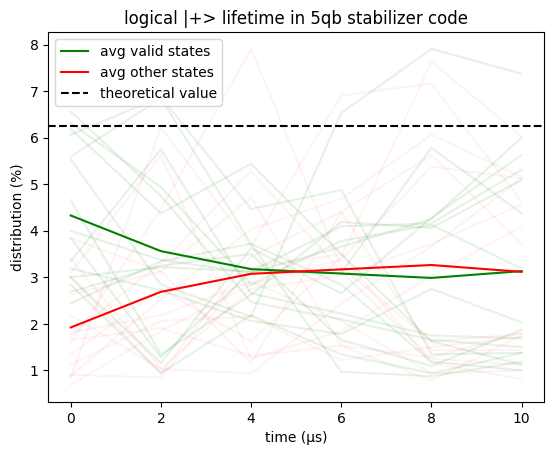

In [14]:

for s in states:
    y[s] = [r[s] for r in results]
    
    if s in valid_states:
        # if s == '00000':
        #     plt.plot(x, y[s], alpha=0.2, color='black')
        #     continue
        plt.plot(x, y[s], alpha=0.1, color='green')
    else:
        plt.plot(x, y[s], alpha=0.05, color='red')


plt.plot(x, [sum([r[s] for s in valid_states])/16 for r in results], label='avg valid states', color='green')
# plt.plot(x, [sum([r[s] for s in valid_states if s != '00000'])/15 for r in results], label='avg valid states', color='black')
plt.plot(x, [sum([r[s] for s in states if s not in valid_states])/16 for r in results], label='avg other states', color='red')

plt.axhline(y=100/16, color='k', linestyle='--', label='theoretical value')
    
# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('distribution (%)')
plt.title('logical |+> lifetime in 5qb stabilizer code')
plt.legend()

# Display the plot
plt.show()

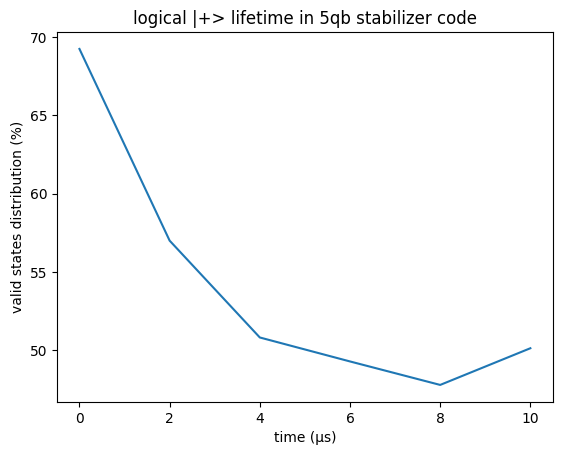

In [15]:
plt.plot(x, [sum([r[s] for s in valid_states]) for r in results])

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('valid states distribution (%)')
plt.title('logical |+> lifetime in 5qb stabilizer code')
# plt.legend()

# Display the plot
plt.show()

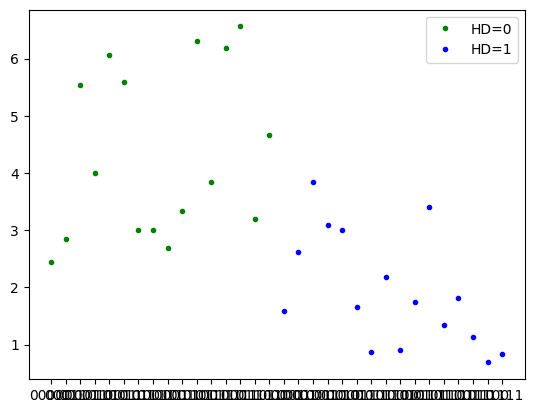

In [21]:
plot_results_hamming_distance(results[0], 5, valid_states)

TVD

In [16]:
alpha = {}

for s in states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


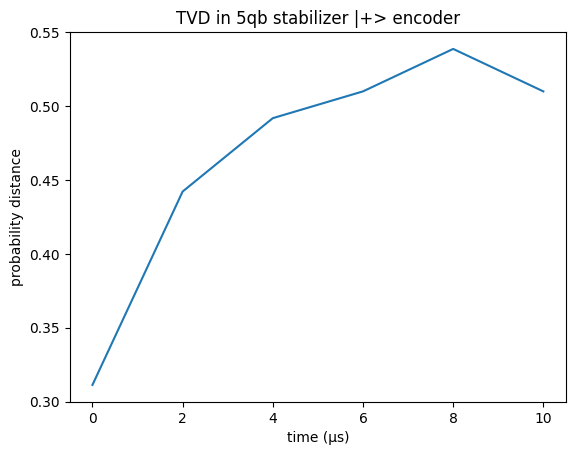

In [17]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in states])/2 for r in results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in 5qb stabilizer |+> encoder')

# Display the plot
plt.show()

In [18]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 31.13%
